In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from tools.hh_experiments_loading import load_tsp_results, load_exp, exp_progress_loader, exp_chronics_loader

In [2]:
sns.set(context='talk', font_scale=0.9, rc={'figure.figsize':(20,9)})

In [7]:
#loading the experiments of tree-shaped search space
tree_process, tree_final = load_tsp_results("./dumps/1st benchmark/", exp_progress_loader)

code_desc_wo_codes = {
    "4.1.1" : "py.ES default",
    "4.1.2" : "py.ES tuned",
    "4.1.3" : "py.ES random",
    "4.1.4" : "py.ES TPE",
    "4.1.5" : "py.ES BRR",
    "4.2.1" : "py.SA default",
    "4.2.2" : "py.SA tuned",
    "4.2.3" : "py.SA random",
    "4.2.4" : "py.SA TPE",
    "4.2.5" : "py.SA BRR",
    "4.3.1" : "j.ES default",
    "4.3.2" : "j.ES tuned",
    "4.3.3" : "j.ES random",
    "4.3.4" : "j.ES TPE",
    "4.3.5" : "j.ES BRR",
    "1.1."  : "random default",
    "1.2."  : "random tuned",
    "2.1."  : "FRAMAB default",
    "2.2."  : "FRAMAB tuned",
    "3.1."  : "BRR default",
    "3.2."  : "BRR tuned",
    "1.3."  : "random random",
    "2.4."  : "FRAMAB TPE",
    "2.5."  : "FRAMAB BRR",
    "3.4."  : "BRR TPE",
    "3.5."  : "BRR BRR"
}
tree_process["ModelType"] = tree_process["Code"].apply(lambda x: code_desc_wo_codes[x])
tree_final["ModelType"] = tree_final["Code"].apply(lambda x: code_desc_wo_codes[x])

tree_process.replace(to_replace={"MHjMetalPyES": "pyES", "MHjMetalPySA": "pySA", "MHjMetalES": "jES"}, inplace=True)
tree_final.replace(to_replace={"MHjMetalPyES": "pyES", "MHjMetalPySA": "pySA", "MHjMetalES": "jES"}, inplace=True)
tree_process["Search space"] = "Tree-shaped"
tree_final["Search space"] = "Tree-shaped"

In [8]:
tree_final

,Mode,Repetition,improvement,iteration,objective,Code,Experiment Group,TSP instance,Optimum,ModelType,Search space
336,pyES,0.0,0.314592,336.0,1.324050e+05,4.1.1,MH,kroA100.tsp,21282,py.ES default,Tree-shaped
336,pyES,1.0,0.307124,336.0,1.340770e+05,4.1.1,MH,kroA100.tsp,21282,py.ES default,Tree-shaped
336,pyES,2.0,0.327534,336.0,1.336990e+05,4.1.1,MH,kroA100.tsp,21282,py.ES default,Tree-shaped
336,pyES,3.0,0.324750,336.0,1.340750e+05,4.1.1,MH,kroA100.tsp,21282,py.ES default,Tree-shaped
336,pyES,4.0,0.305534,336.0,1.343770e+05,4.1.1,MH,kroA100.tsp,21282,py.ES default,Tree-shaped
...,...,...,...,...,...,...,...,...,...,...,...
65,HH,4.0,0.003666,65.0,1.664698e+09,3.5.,HH-PC,pla7397.tsp,23260728,BRR BRR,Tree-shaped
70,HH,5.0,0.011285,70.0,1.909775e+09,3.5.,HH-PC,pla7397.tsp,23260728,BRR BRR,Tree-shaped
76,HH,6.0,0.003092,76.0,1.749227e+09,3.5.,HH-PC,pla7397.tsp,23260728,BRR BRR,Tree-shaped
84,HH,7.0,0.006536,84.0,1.734731e+09,3.5.,HH-PC,pla7397.tsp,23260728,BRR BRR,Tree-shaped


In [10]:
# loading the results of flat search space
exps_flrd = "./dumps/flat_bench/"
flat_chronics = pd.DataFrame()
flat_process = pd.DataFrame()
flat_final = pd.DataFrame()

from core_entities.configuration import Configuration

for e_file_name in os.listdir(exps_flrd):
    expnt = load_exp(exps_flrd + e_file_name)
    ed = expnt.description
    Configuration.set_task_config(expnt.description["TaskConfiguration"])
    
    chronic = exp_chronics_loader(expnt)
    progres = exp_progress_loader(expnt)
    final = progres.iloc[-1]
    
    mode = ed["DomainDescription"]["DataFile"][ed["DomainDescription"]["DataFile"].rfind("/") +1 : ed["DomainDescription"]["DataFile"].rfind("Data")]
    model = ed["ModelConfiguration"]["ModelType"]
    tsp_instance = ed["TaskConfiguration"]["Scenario"]["problem_initialization_parameters"]["instance"]
    tsp_instance = tsp_instance[tsp_instance.rfind("/") + 1:]
    
    # if it is needed to differentiate the repetitions
    #if e_file_name.rfind("(") == -1: repetition = 0
    #else: repetition = int(e_file_name[e_file_name.rfind("(") + 1:e_file_name.rfind(")")]) + 1

    for ed in [chronic, progres, final]:
        ed["Mode"] = mode
        ed["ModelType"] = mode +  " " + model
        ed["TSP instance"] = tsp_instance
        #ed["Repetition"] = repetition
    flat_chronics = flat_chronics.append(chronic, sort=False)
    flat_process = flat_process.append(progres, sort=False)
    flat_final = flat_final.append(final, sort=False)

flat_chronics["Search space"] = "Flat"
flat_process["Search space"] = "Flat"
flat_final["Search space"] = "Flat"

/home/sem/mypyvenv/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/sem/mypyvenv/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/sem/mypyvenv/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [11]:
tsp_problems = ["kroA100.tsp", "pr439.tsp", "rat783.tsp", "pla7397.tsp"]

In [12]:
joined_final = flat_final.append(tree_final, sort=False) # does not modifies old dataframe, but returns updated dataframe

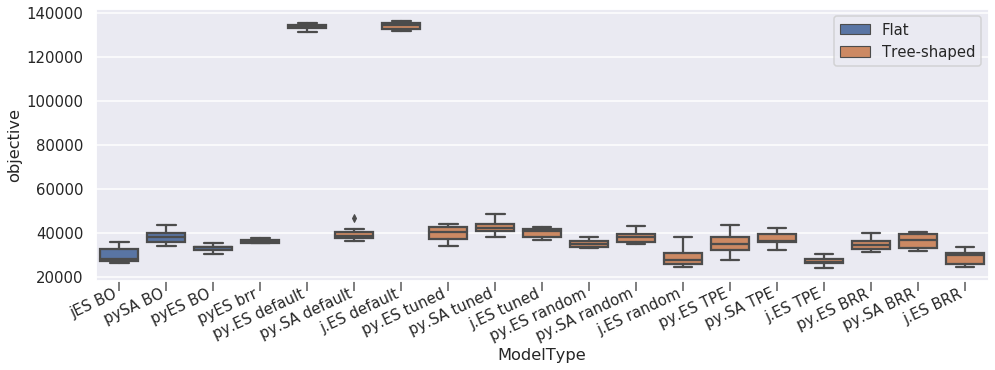

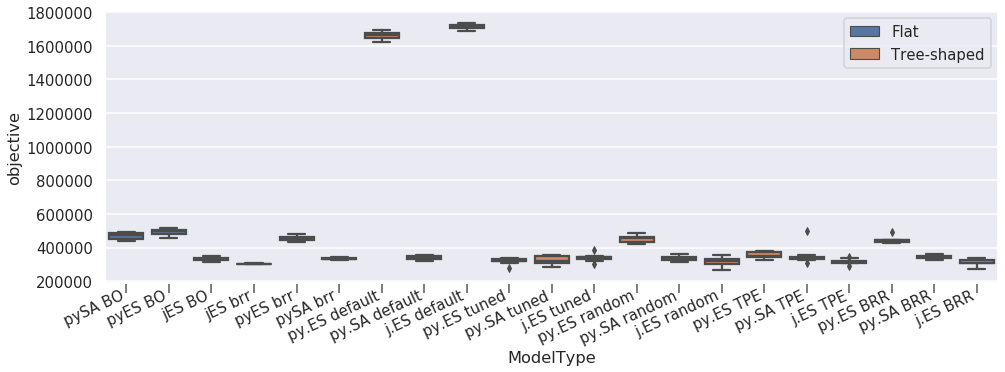

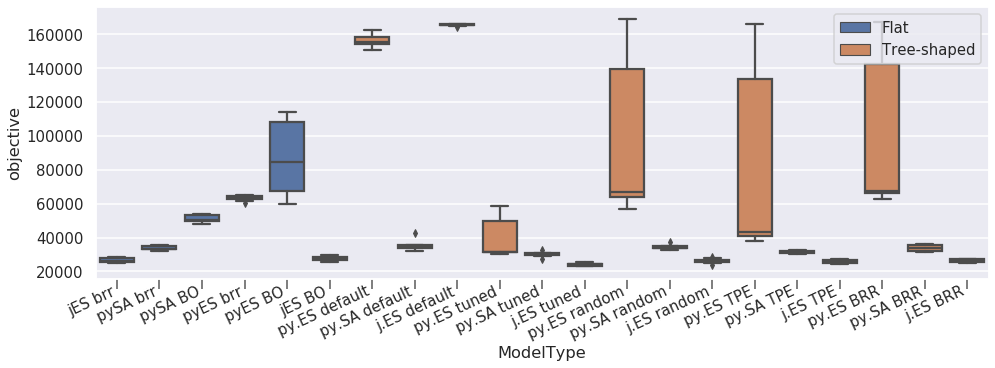

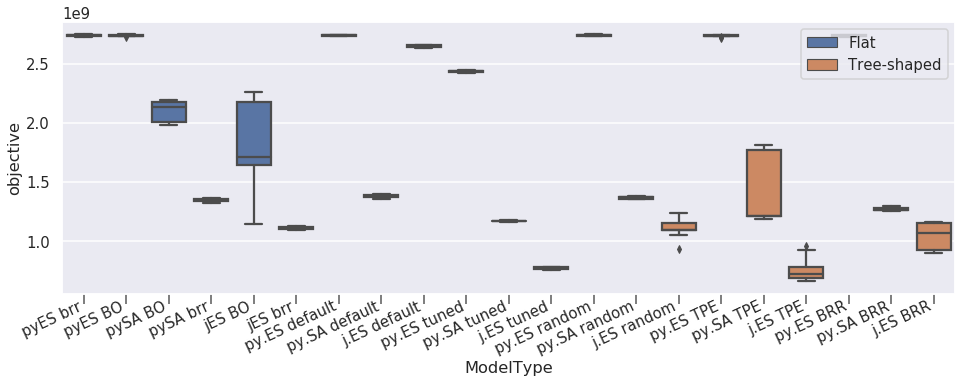

In [13]:
for tsp_instance in tsp_problems:
#for tsp_instance in ["kroA100.tsp"]:
    condition = (joined_final["TSP instance"] == tsp_instance) & (joined_final["Mode"] != "HH")
    blf = joined_final[condition].copy(deep=True)
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), 
                             sharey=True,
                             gridspec_kw={'wspace':0.01}
                            )
    g = sns.boxplot(x="ModelType", y='objective', 
                    hue="Search space",
                    dodge=False, 
                    data=blf,
                    ax=axes
                   )
    #g.axes.axhline(instances_optimums[tsp_instance], color='green', ls='--').set_label("optimum")
    #g.set(ylim=(zoomed_boundaries[tsp_instance][0], zoomed_boundaries[tsp_instance][1]))
    g.xaxis.set_ticks_position('bottom')
    g.xaxis.set_tick_params(color='gray', pad=-5, width=2, length=10)
    g.set_xticklabels(g.get_xticklabels(), rotation=25, horizontalalignment='right')
    axes.legend(loc=1)
    plt.show()

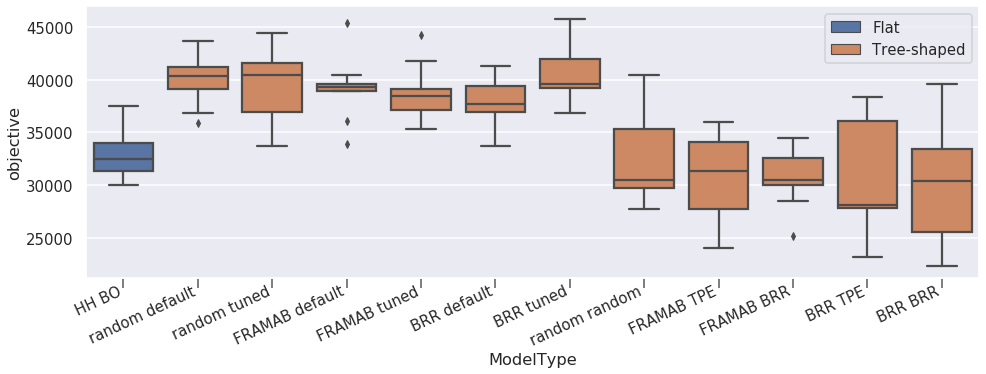

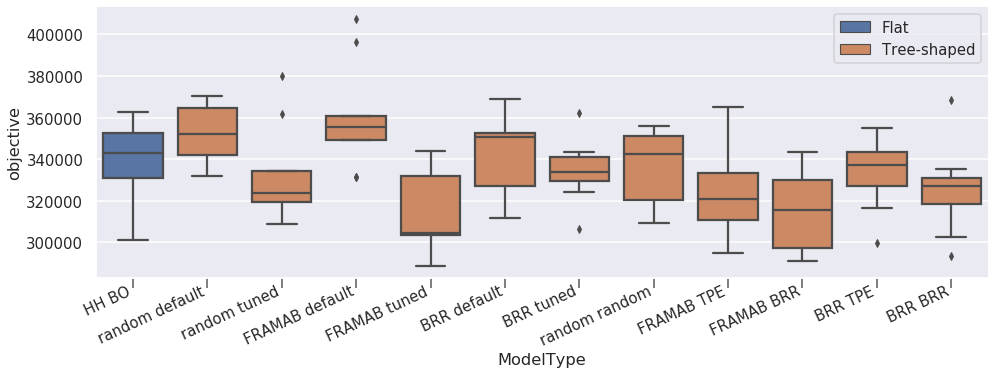

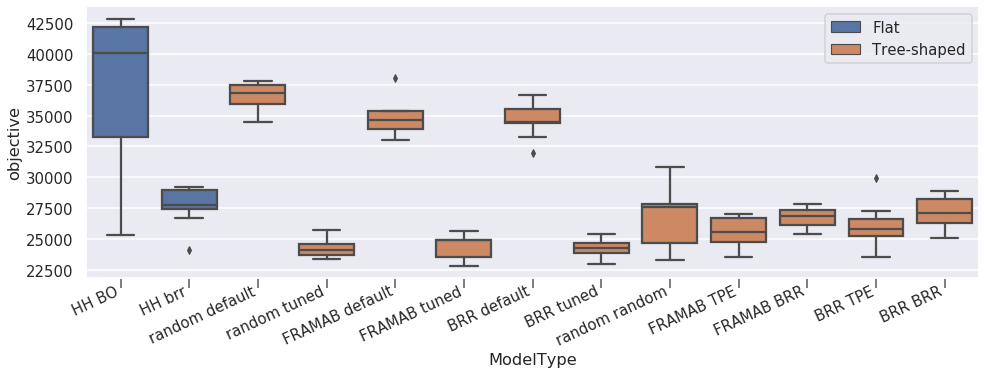

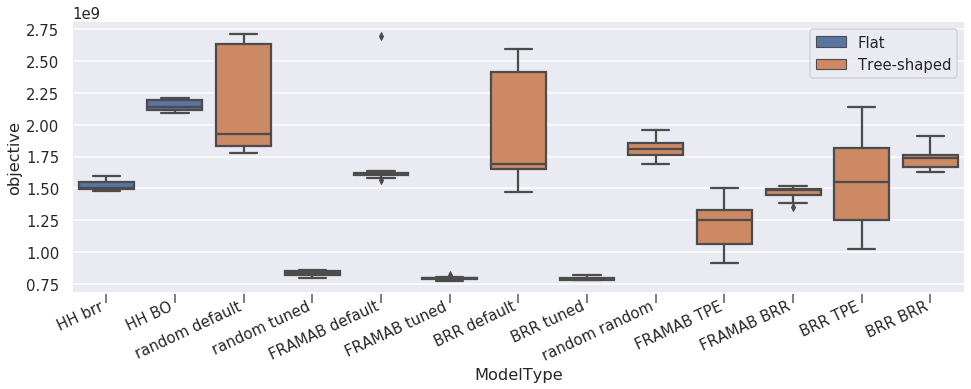

In [14]:
for tsp_instance in tsp_problems:
#for tsp_instance in ["kroA100.tsp"]:
    condition = (joined_final["TSP instance"] == tsp_instance) & (joined_final["Mode"] == "HH")
    blf = joined_final[condition].copy(deep=True)
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), 
                             sharey=True,
                             gridspec_kw={'wspace':0.01}
                            )
    g = sns.boxplot(x="ModelType", y='objective', 
                    hue="Search space",
                    dodge=False, 
                    data=blf,
                    ax=axes
                   )
    #g.axes.axhline(instances_optimums[tsp_instance], color='green', ls='--').set_label("optimum")
    #g.set(ylim=(zoomed_boundaries[tsp_instance][0], zoomed_boundaries[tsp_instance][1]))
    g.xaxis.set_ticks_position('bottom')
    g.xaxis.set_tick_params(color='gray', pad=-5, width=2, length=10)
    g.set_xticklabels(g.get_xticklabels(), rotation=25, horizontalalignment='right')
    axes.legend(loc=1)
    plt.show()